# Introdução

<b><i><font color = "GREEN">PERGUNTA: </b></i></font>

É posível afirmar que um país com alto IDH, garante saúde mental às pessoas?


# Análises e explicação dos resultados

Inicialmente, é necessário importar os dados de análise no programa que, nesse caso, são o de IDH, Horas de trabalho por semana e Mortes por suicídio. Para tanto, utiliza-se a biblioteca pandas:

In [2]:
import pandas as pd

<u> Índice de Desenvolvimento Humano </u>

In [3]:
hdi=pd.read_excel('hdi_human_development_index.xlsx')

<u> Horas de trabalho por semana </u>

In [4]:
work=pd.read_excel('working_hours_per_week.xlsx')

<u> Mortes por suicídio </u> 

In [5]:
suicide=pd.read_excel('suicide_total_deaths.xlsx')

Agora que os dados já foram importados, basta escolher um ano para analisá-los. Nesse caso, ao invés de um ano, foram escolhidos dois anos para análise: <b>2002 e 2004</b>.

In [6]:
hdi_2002_e_2004=hdi.loc[:,['geo',2002,2004]]

In [7]:
work_2002_e_2004=work.loc[:,['geo',2002,2004]]

In [8]:
suicide_2002_e_2004=suicide.loc[:,['geo', 2002,2004]]

<b>Análise das tabelas em conjunto </b>

Com o intuito de saber se os dados possuem relação entre si para, assim, responder a pergunta inicial ("É posível afirmar que um país com alto IDH, garante saúde mental às pessoas?"), é interessante juntar todos os dados em um único só para análise. No entanto, antes da união de dados, é necessário retirar países que não possuem dados de IDH ou mortes por suicídio ou de horas trabalhadas por semana; que são representadas nas tabelas pelo elemento "Nan". Isto é, não tem como analisar um dado nulo. 

Além disso, é preciso definir um índice que será igual para as tabelas que, nesse caso, será o índice "geo" que representa os países. Em suma, primeiramente, define-se o índice dos três dados, retira-se os dados nulos e, finalmente, junta-se os dados em um só. 

In [9]:
hdi_idx=hdi_2002_e_2004.set_index('geo')
work_idx=work_2002_e_2004.set_index('geo')
suicide_idx=suicide_2002_e_2004.set_index('geo')

work_notnull = work_idx[~work_idx[2002].isnull()]

dados=hdi_idx.join(work_notnull, how='inner', lsuffix='_hdi', rsuffix='_work')

suicide_idx=suicide_idx.rename(index=str, columns=lambda column: str(column)+"_suicide")

data=dados.join(suicide_idx, how='inner')

Com a junção de dados, pode-se analisar se o idh possui alguma relação com o número de horas trabalhadas por semana ou se o idh possui relação com o número de mortes por suicídio. Antes de analisar todos os dados em conjunto, é interessante armazenar esse novo dado num arquivo e salvá-lo. Para tanto, é necessário executar o seguinte programa:

In [10]:
data.to_csv( 'data_hdi_suicide_work.csv', index=True)

O arquivo foi salvo em csv e não em excel apenas pelo csv poder ser lido em outros programas. Isto é, existem programas que leem apenas arquivos csv e por isso, a opção csv é a melhor para salvar.

Agora que os dados já foram juntados e salvos, é preciso fazer uma análise de todos eles. Para tanto, é interessante fazer uma análise utiizando gráficos de dispersão:

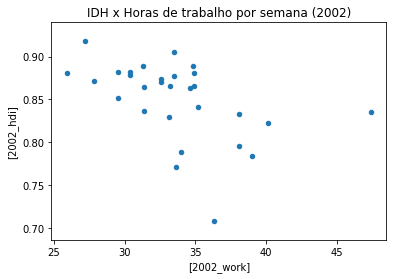

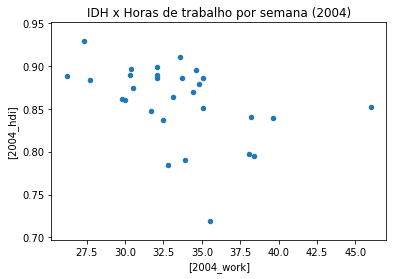

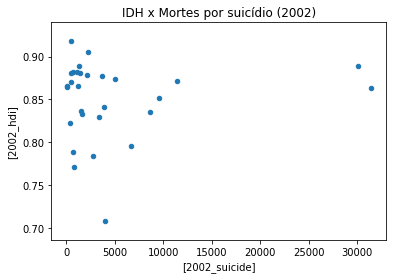

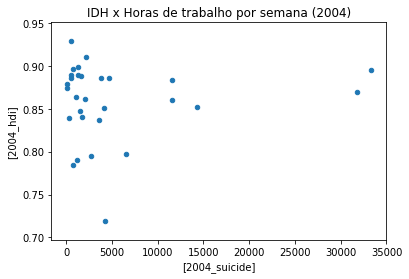

In [13]:
data.plot.scatter(x=['2002_work'],y=['2002_hdi'], title='IDH x Horas de trabalho por semana (2002)')
data.plot.scatter(x=['2004_work'],y=['2004_hdi'], title='IDH x Horas de trabalho por semana (2004)')
data.plot.scatter(x=['2002_suicide'],y=['2002_hdi'], title='IDH x Mortes por suicídio (2002)')
data.plot.scatter(x=['2004_suicide'],y=['2004_hdi'], title='IDH x Horas de trabalho por semana (2004)')

Nota-se que, a partir dos gráficos de "IDH x Horas de trabalho por semana", pode-se analisá-lo mais facilmente, pois os pontos não estão todos juntos (aglomerados); o que já não ocorre com os gráficos de "IDH x Mortes por suicídio". Logo, para facilitar a análise dos gráficos "IDH x Mortes por suicídio", é interessante deixar o logarítimo como base dos valores do eixo x e y. 

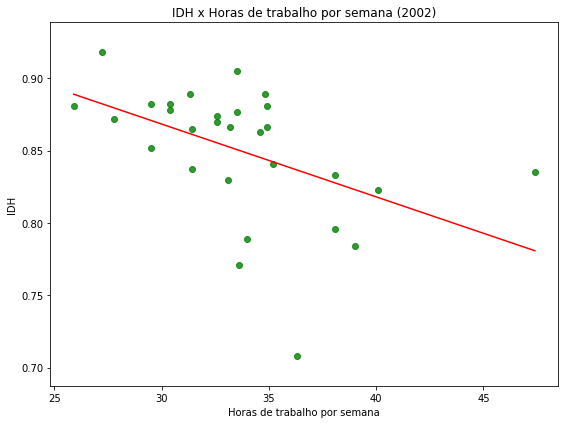

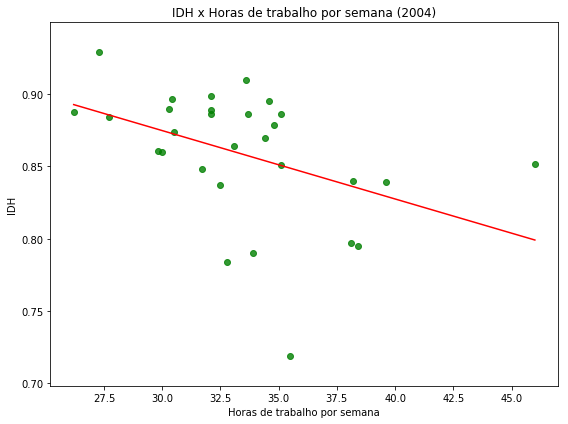

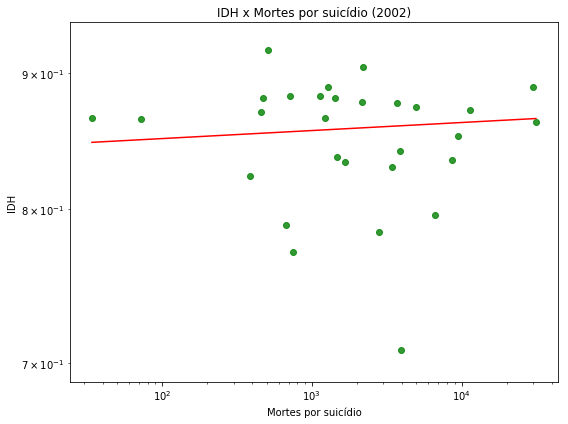

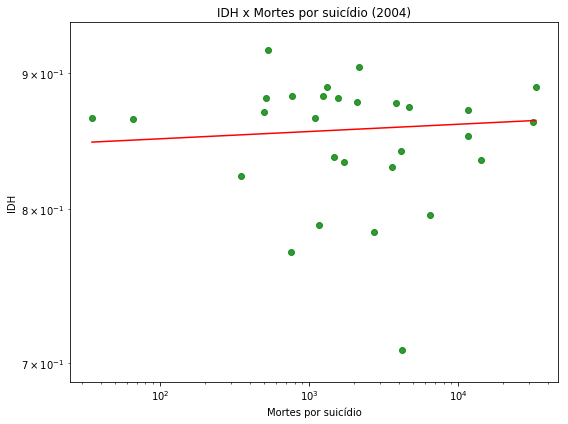

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

#Função da reta de correlação com o gráfico de dispersão; retirada de https://pastebin.com/0KcDyqKq e adaptada. 
def reta(dados_x, dados_y, titulo, eixox, eixoy,arg):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='green', alpha=0.8)
    if arg==True:
        plt.loglog()
    plt.title(titulo)
    plt.xlabel(eixox)
    plt.ylabel(eixoy)
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='red')
 
    plt.tight_layout()
    plt.show()

reta(data['2002_work'],data['2002_hdi'], 'IDH x Horas de trabalho por semana (2002)', 'Horas de trabalho por semana', 'IDH', False)
reta(data['2004_work'],data['2004_hdi'], 'IDH x Horas de trabalho por semana (2004)', 'Horas de trabalho por semana', 'IDH', False)
reta(data['2002_suicide'],data['2002_hdi'], 'IDH x Mortes por suicídio (2002)', 'Mortes por suicídio', 'IDH', True)
reta(data['2004_suicide'],data['2002_hdi'], 'IDH x Mortes por suicídio (2004)', 'Mortes por suicídio', 'IDH', True)

Agora, já é possível analisar o gráfico de "IDH x Mortes por suicídio" mais facilmente. 

Além do gráfico de dispersão, foi traçada uma reta de correlação. Esta, possui uma característica interessante pois ela mostra uma reta que mais se aproxima dos pontos que compõem gráfico. Assim, a reta mostra um ideal de comportamento que os pontos deveriam seguir. Isso não quer dizer que, necessariamente, os pontos se comportarão com a mesma proporção da reta. 

Analisando o gráfico "IDH x Horas de trabalho por semana (2002)", nota-se que para a maioria dos países com alto IDH, as pessoas tendem a trabalhar menos horas por semana. Para países com IDH médio, as horas trabalhadas por semana tendem a serem maiores, mas existem pontos fora da curva. Resumindo, grande parte dos países se comportam como a reta de correlação, com algumas exceções. Isso mostra que nem todos os pontos seguem a mesma proporção fornecida pela reta. Logo, ela acaba sendo mais interessante pelo seu aspecto crescente ou decrescente, possibilitando uma análise mais visual. 

Analisando o gráfico "IDH x Horas de trabalho por semana (2004)", é possível notar que há pequenas mudanças. Dessa forma, a partir de uma análise geral, nota-se que o comportamento dos pontos ainda são muito parecidos com o gráfico de 2002, o que mostra que as pessoas da maioria dos países com alto IDH, tendem a trabalhar menos horas por semana, contendo, ainda, alguma exceções.  

Partindo para a análise do gráfico "IDH x Mortes por suicídio (2002)", nota-se que não existe uma relação clara entre o IDH e as mortes causadas por suicídio. O gráfico mostra que mesmo que o país tenha alto IDH, o número de mortes por suicídio pode variar desde 100 a 10000 mortes. O mesmo ocorre no gráfico "IDH x Mortes por suicídio (2004)". Isto é, o IDH de um país não tem relação com o número de mortes por suicídio de pessoas do país, embora a reta de correlação seja crescente (que diria que quanto maior o IDH do país, mais mortes por suicídio, o que não é verdade tendo em vista que países de baixo IDH também têm um grande número de mortes por suicídio).

## Conclusão

Inicialmente, acreditava-se que países com alto IDH tenderiam a ter menos horas por trabalho, portanto, as pessoas teriam menos estresse, cansaço físico e mental. Assim, considerando o cansaço mental como principal motivo para o suicídio e, seguindo essa linha de raciocínio, países com alto IDH também teriam menos mortes por suicídio e, assim, poderia se dizer que países com alto IDH garantem saúde mental às pessoas. 

No entanto, a partir da análise dos dados, foi possível observar que o número de horas trabalhadas por pessoa por semana, até possuem uma relação, na qual quanto maior o IDH do país, menos horas as pessoas trabalham, contendo algumas exceções de países que não seguem essa regra. Já o número de mortes por suicídio, não possui nenhuma relação com o IDH do país. Assim, não é possível fazer qualquer relação entre horas trabalhadas por semana e mortes por suicídio. Ou seja, talvez a linha de raciocínio proposta inicialmente esteja errada. 

Assim sendo, do ponto de vista de horas de trabalho por semana, as pessoas tendem a trabalhar menos em países com alto IDH, possibilitando uma vida menos estressante e, portanto, garantindo uma saúde mental melhor. Por outro lado, as mortes por suicídio não possuem relação com o IDH do país. Assim, não é possível responder a pergunta proposta inicialmente com apenas um sim ou um não. Com essa análise de dados, talvez a melhor resposta seja que a saúde mental das pessoas não se altera com o IDH do país.  